## test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import glob

from select_datasets import Select_datasets as my_SD

from visualize import visualization
myvs = visualization()

In [3]:
# Constant

f_s = 12.5*10**3
th_s = 2
N = 4096
pixel_number=36

f_range = f_s/th_s
f_resolution = f_range/N

In [4]:
#sample_data

path="/data7/ALL/db/ns/8k"
npz_files = glob.glob(path+"/**.npz")

plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.get_cmap("Set1").colors)

d = np.load(npz_files[3])

D_df = pd.DataFrame(d["arr_0"]).T

## データ取得

In [5]:
from sklearn.preprocessing import StandardScaler

In [6]:
min_freq = 0.1
max_freq = 15

start = math.ceil(min_freq/f_resolution)-1
stop = math.ceil(max_freq/f_resolution)-1

x = np.arange(start+1,stop+1)*f_resolution
D_df_limfreq = D_df.iloc[:,start:stop]

print(start,stop)

0 9


In [7]:
myds = my_SD("/data7/ALL/db/ns/8k")

data_df = myds.concat_npz()

In [8]:
data_df_pre = data_df.iloc[:,start:stop]
data_df_pre.replace(0, np.nan, inplace=True)

/tmp/ipykernel_2646680/2390711002.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_df_pre.replace(0, np.nan, inplace=True)


In [9]:
data_df_pre=data_df_pre.dropna(axis=0,how="all")
data_df_pre=data_df_pre.dropna(0)
data_df_pre.index = list(range(0,len(data_df_pre)))
data_df_pre

/tmp/ipykernel_2646680/1731398658.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  data_df_pre=data_df_pre.dropna(0)


0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
103606  122.093491  116.433336  145.048783  114.312061  192.500221   
103607  104.721016  133.593078  151.468548  248.887670  189.338949   
103608   46.706180  152.973006  166.045044  166.933334  203.486829   
103609  105.969081  152.464743  240.822518  264.686312  293.389996   
103610  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
...            ...         ...         ...         ...  
103606  288.475542  235.521077  326.818310  325.784505  
103607  276.713913  191.168293  400.484528  327.071259  
103608  321.153870  251.722031  296.447174  325.160645  
103609  274.296324  175.683277  307.671430  405.552416  
103610  219.059660  341.781429  401.365567  312.127433  

[103611 rows x 9 columns]

## 分ける

In [10]:
df_test =  data_df_pre.sample(frac=0.01)
df_train = data_df_pre[~data_df_pre.index.isin(df_test.index)]

In [11]:
df_train.index = range(len(df_train))
df_train

0           1           2           3           4  \
0       172.896067  176.513317  251.178517  237.754544  296.303427   
1        75.659870  120.790621  169.793157  125.246630  179.171441   
2        96.913210  113.915134  121.180175  122.038119  161.548251   
3       126.852502  116.382145  156.818553  166.869081  215.471876   
4       152.509383   80.845047  142.408379  100.871204  170.583987   
...            ...         ...         ...         ...         ...   
102570  122.093491  116.433336  145.048783  114.312061  192.500221   
102571  104.721016  133.593078  151.468548  248.887670  189.338949   
102572   46.706180  152.973006  166.045044  166.933334  203.486829   
102573  105.969081  152.464743  240.822518  264.686312  293.389996   
102574  144.451794   98.450465  165.335247  225.233102  234.669472   

                 5           6           7           8  
0       458.932187  292.656312  307.286854  387.060255  
1       172.916762  365.257365  228.995861  334.066903  
2       175.660607  169.937570  264.225008  296.083163  
3       246.746340  190.952035  221.437342  354.225474  
4       265.994181  350.298726  220.398215  326.459230  
...            ...         ...         ...         ...  
102570  288.475542  235.521077  326.818310  325.784505  
102571  276.713913  191.168293  400.484528  327.071259  
102572  321.153870  251.722031  296.447174  325.160645  
102573  274.296324  175.683277  307.671430  405.552416  
102574  219.059660  341.781429  401.365567  312.127433  

[102575 rows x 9 columns]

In [12]:
df_test.index = range(len(df_test))
df_test

0           1           2           3           4           5  \
0     123.659907  101.841515  124.223634  198.728347  228.425339  250.586493   
1     146.348511  173.875899  323.766538  203.545498  198.115782  214.231960   
2     149.948531  289.888436  187.693766  241.042997  250.448194  289.225540   
3     148.836169  134.336850  152.719985  204.966660  233.726589  238.273900   
4     177.455072  145.360147  218.482029  335.774268  181.637527  405.461847   
...          ...         ...         ...         ...         ...         ...   
1031  133.490974  178.505573  147.805906  236.538724  187.393479  202.500487   
1032  136.420145  185.659405  123.784998  181.536237  192.767670  229.354893   
1033  141.766273  155.232124  220.047512  261.368810  287.736910  238.219244   
1034  147.766745  269.728841  178.431630  187.443030  209.108857  228.312030   
1035  119.533414  175.061470  160.636153  179.223385  242.619908  217.451064   

               6           7           8  
0     346.316800  263.809043  271.677344  
1     239.770231  338.329963  363.024414  
2     332.810490  355.360749  386.892372  
3     244.552701  307.506727  331.984548  
4     186.725025  280.856305  262.448105  
...          ...         ...         ...  
1031  242.363124  199.468996  301.507998  
1032  356.888981  329.170494  915.762620  
1033  399.432281  341.518512  385.693990  
1034  250.235367  346.813888  348.824369  
1035  367.134514  233.475437  202.311541  

[1036 rows x 9 columns]

In [13]:
sc = StandardScaler()
sc.fit(df_train)
df_train_std = pd.DataFrame(sc.transform(df_train))
df_train_std

0         1         2         3         4         5         6  \
0       0.068486  0.064068  0.604356  0.256281  0.527717  1.439624  0.037742   
1      -0.407652 -0.378017 -0.111262 -0.665578 -0.420649 -0.632104  0.542991   
2      -0.303581 -0.432565 -0.538715 -0.691868 -0.563336 -0.612230 -0.816288   
3      -0.156976 -0.412993 -0.225348 -0.324535 -0.126740 -0.097326 -0.670043   
4      -0.031342 -0.694932 -0.352056 -0.865304 -0.490178  0.042094  0.438890   
...          ...       ...       ...       ...       ...       ...       ...   
102570 -0.180280 -0.412587 -0.328839 -0.755173 -0.312732  0.204936 -0.359876   
102571 -0.265348 -0.276447 -0.272390  0.347503 -0.338327  0.119741 -0.668538   
102572 -0.549430 -0.122693 -0.144220 -0.324009 -0.223778  0.441638 -0.247130   
102573 -0.259237 -0.126725  0.513296  0.476953  0.504128  0.102230 -0.776302   
102574 -0.070798 -0.555257 -0.150461  0.153684  0.028694 -0.297872  0.379616   

               7         8  
0      -0.061554  0.180335  
1      -0.548072 -0.116087  
2      -0.329150 -0.328552  
3      -0.595043 -0.003329  
4      -0.601500 -0.158641  
...          ...       ...  
102570  0.059819 -0.162415  
102571  0.517599 -0.155218  
102572 -0.128914 -0.165905  
102573 -0.059164  0.283772  
102574  0.523074 -0.238807  

[102575 rows x 9 columns]

## テストデータを見る

In [14]:
List_train_data = df_train.values.tolist()
List_test_data = df_test.values.tolist()

In [15]:
def show_multiple_figure_TwoSorce(x,sorce_one,sorce_two,ylim=1000,sorce1_label=False):
    
    fig,ax = plt.subplots()

    if sorce1_label == False:

        for i in sorce_one:
                ax.plot(x,i)

    else:
        for i,label in zip(sorce_one,sorce1_label):
            ax.plot(x,i,label = label)
        ax.legend()

    for i in sorce_two:
        ax.plot(x,i,color="black")
       

    ax.set_ylim(0,ylim)

108


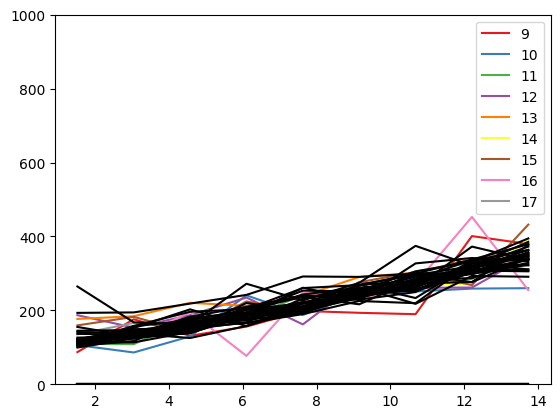

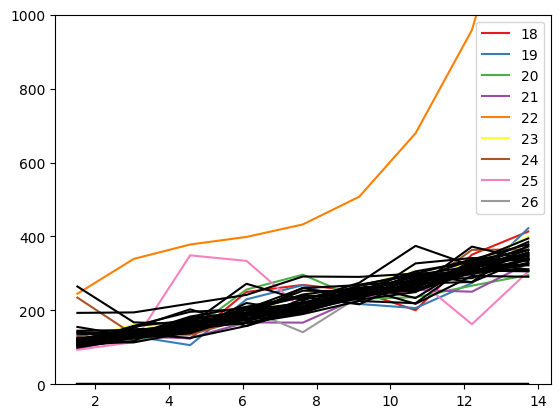

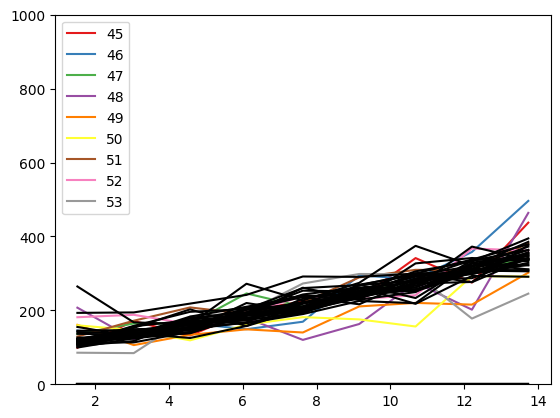

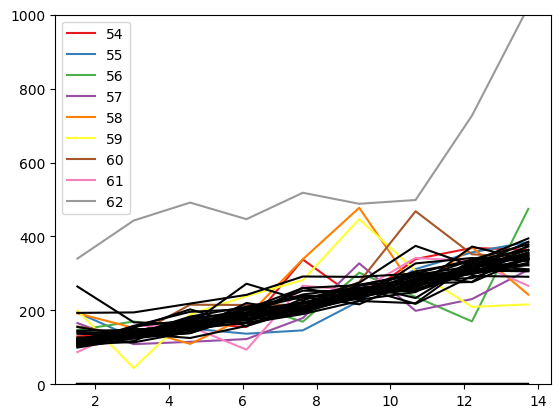

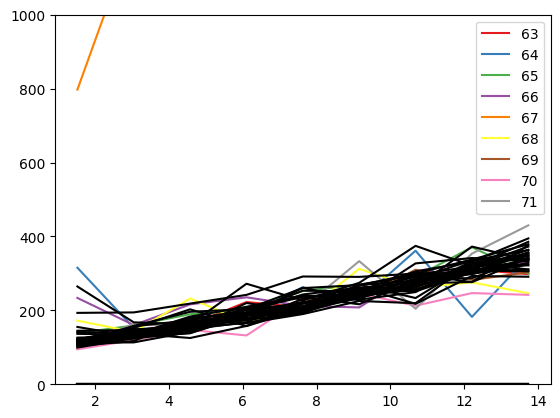

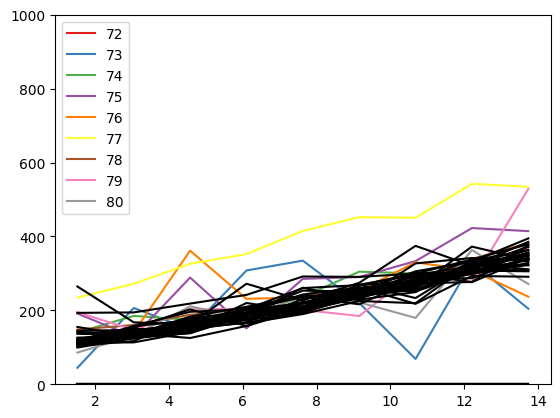

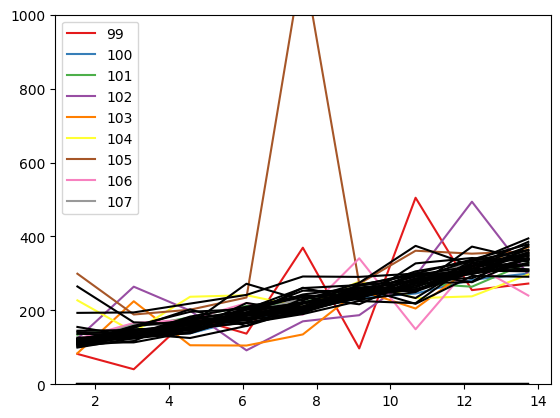

In [16]:
number=0
while number<100:
    show_multiple_figure_TwoSorce(x,List_test_data[number:number+9],D_df_limfreq.values.tolist(),sorce1_label=range(number,number+9))
    number+=9
print(number)

207


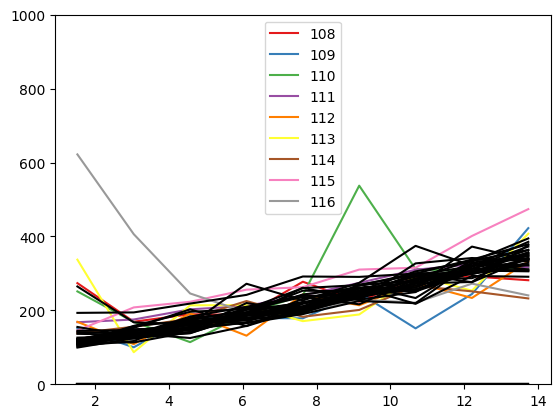

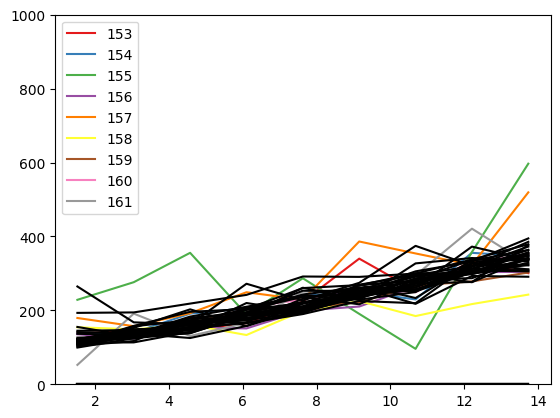

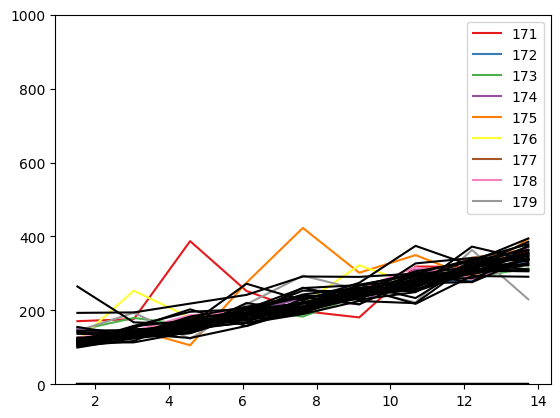

In [17]:
number=108
while number<200:
    show_multiple_figure_TwoSorce(x,List_test_data[number:number+9],D_df_limfreq.values.tolist(),sorce1_label=range(number,number+9))
    number+=9
print(number)

306


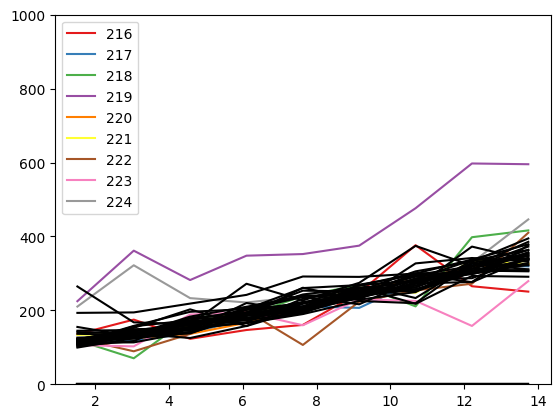

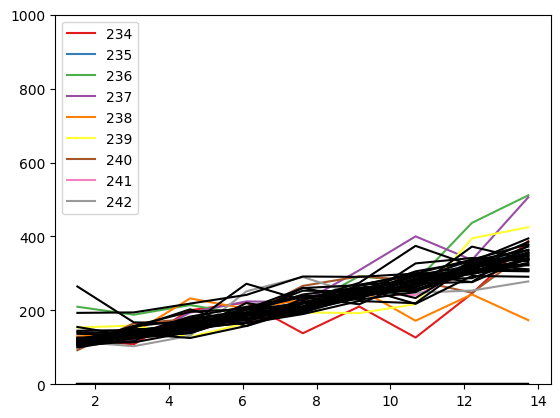

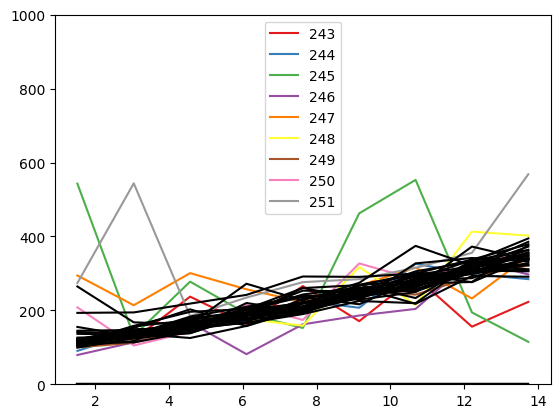

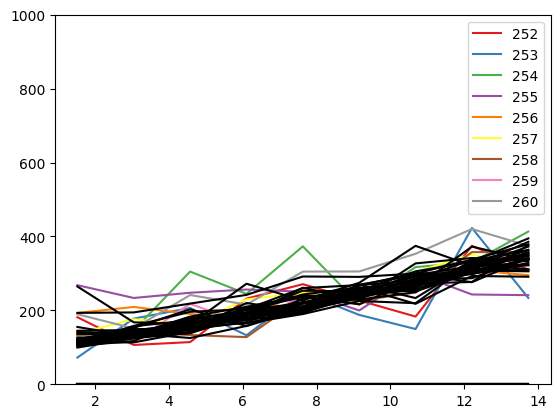

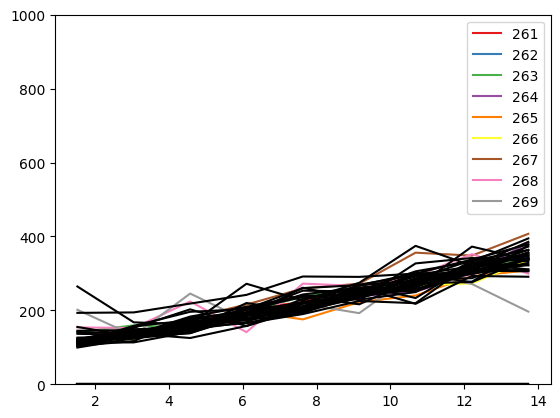

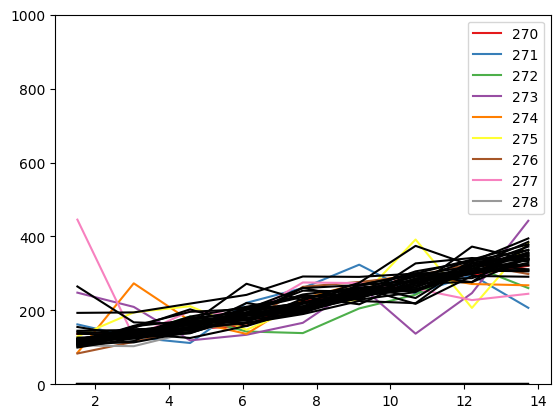

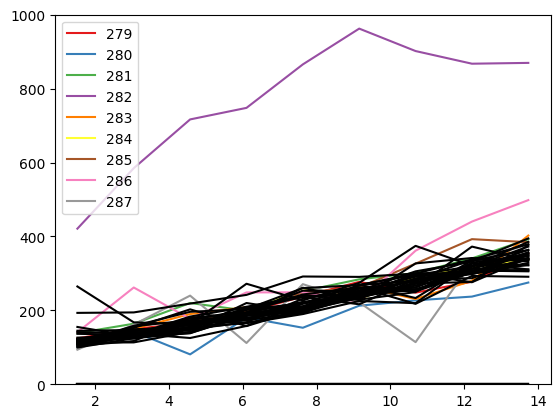

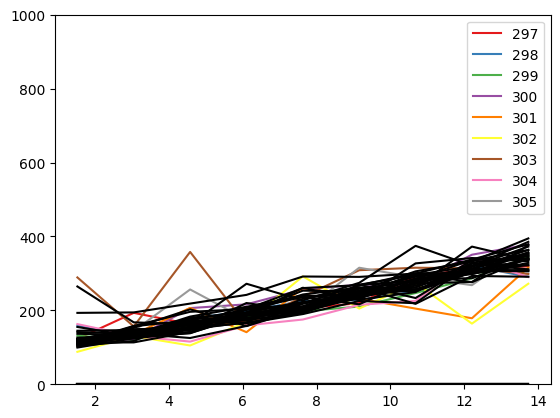

In [18]:
number=207
while number<300:
    show_multiple_figure_TwoSorce(x,List_test_data[number:number+9],D_df_limfreq.values.tolist(),sorce1_label=range(number,number+9))
    number+=9
print(number)

405


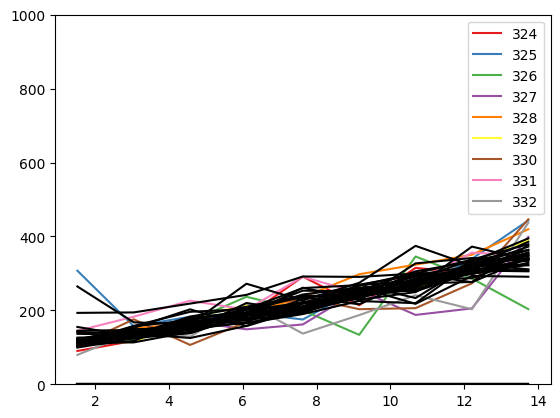

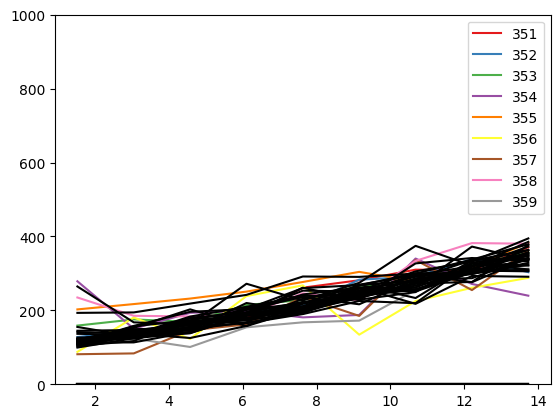

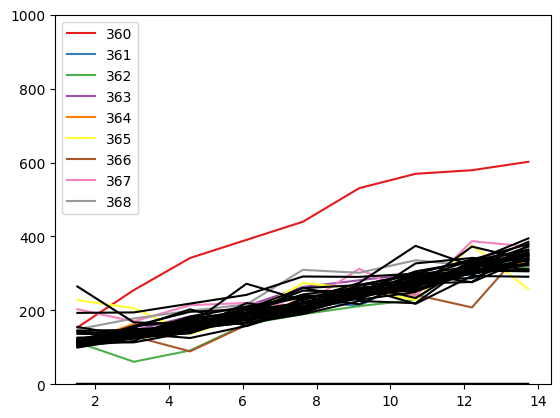

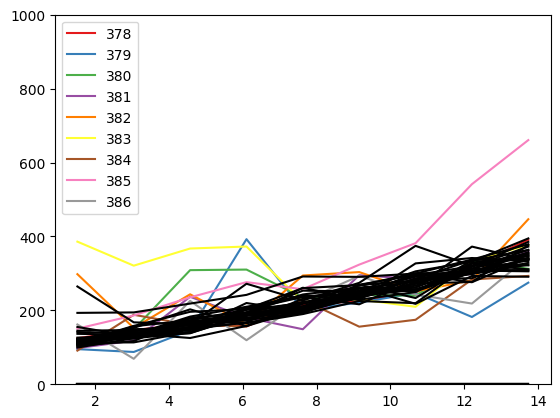

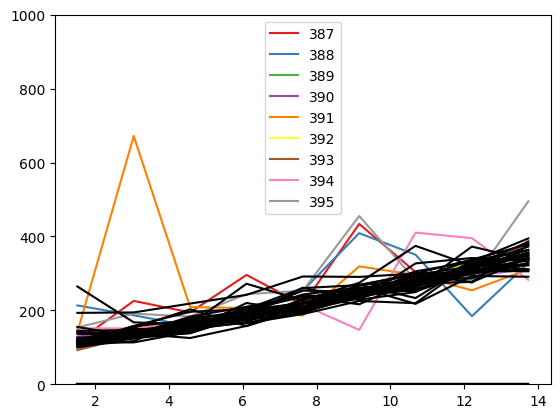

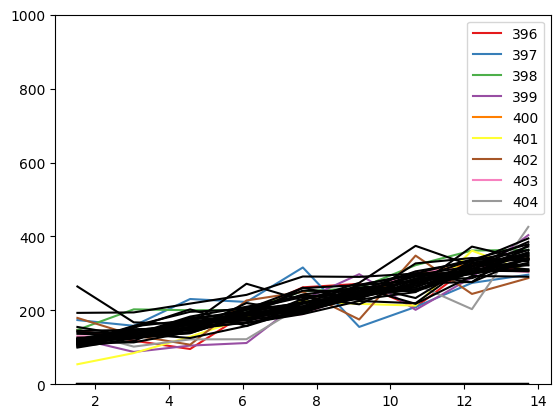

In [19]:
number=306
while number<400:
    show_multiple_figure_TwoSorce(x,List_test_data[number:number+9],D_df_limfreq.values.tolist(),sorce1_label=range(number,number+9))
    number+=9
print(number)

504


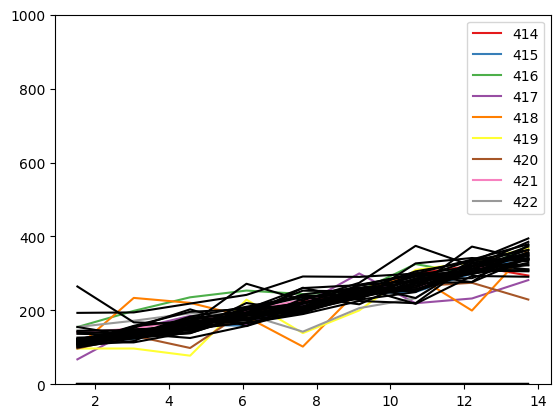

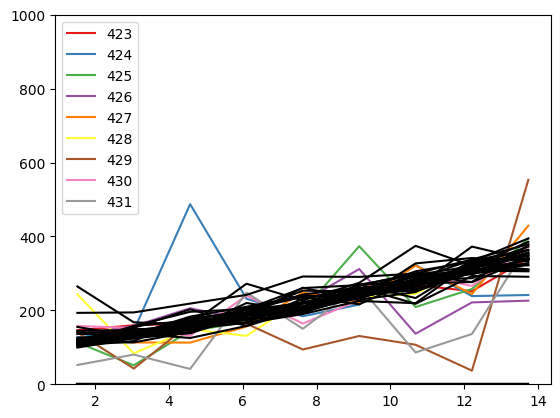

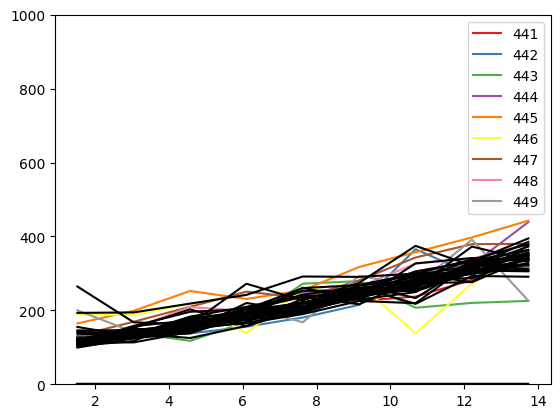

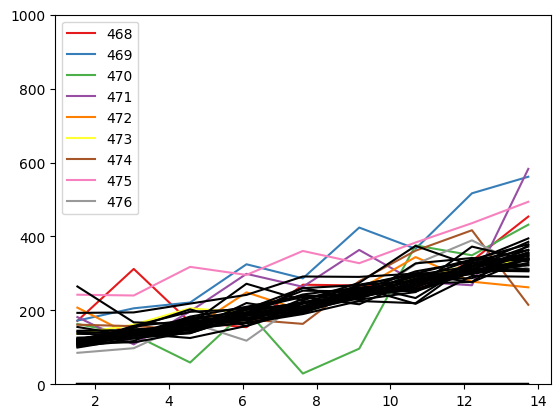

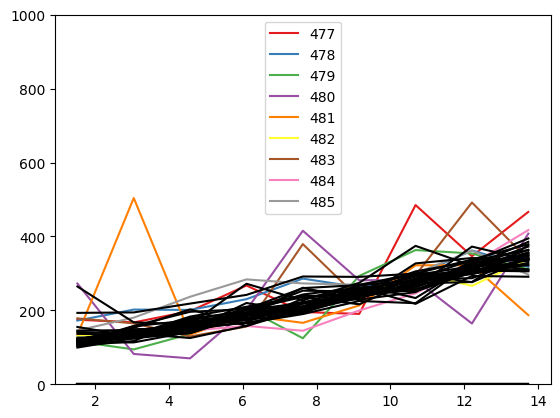

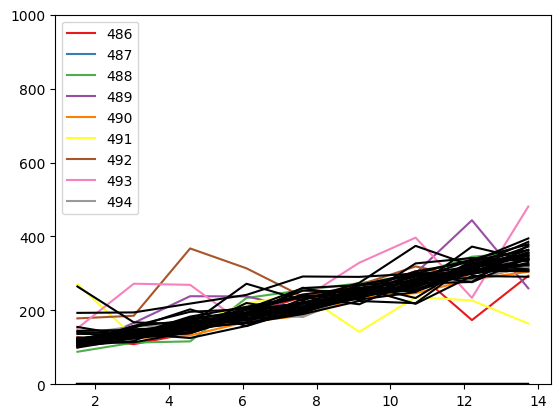

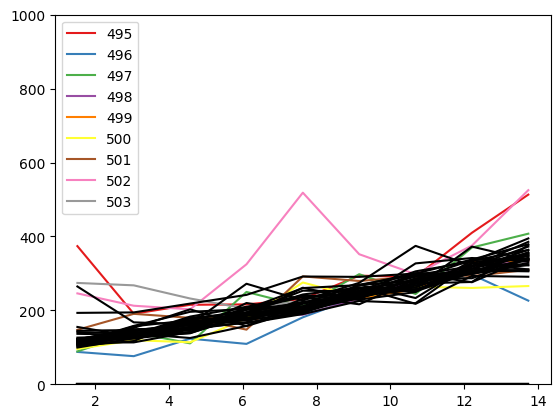

In [20]:
number=405
while number<500:
    show_multiple_figure_TwoSorce(x,List_test_data[number:number+9],D_df_limfreq.values.tolist(),sorce1_label=range(number,number+9))
    number+=9
print(number)